# Prototype for the Blue Carbon Cost tool:

In [8]:
import sys

#sys.path.append("../src/bcc_model/")

# import libraries
import pandas as pd  # noqa: I001


In [9]:
# Import excel with the import datai
data_path = "../raw_data/data_ingestion.xlsm"

# Open the excel file - tab 'master_table'
master_table = pd.read_excel(data_path, sheet_name="master_table")

# Open the excel file - tab 'base_size_table'
base_size = pd.read_excel(data_path, sheet_name="base_size_table")

# Open the excel file - tab 'base_increase'
base_increase = pd.read_excel(data_path, sheet_name="base_increase")

base_size.head()

,base_size_id,activity,ecosystem,feasibility_analysis,conservation_planning_and_admin,data_collection_and_field_cost,community_representation,blue_carbon_project_planning,establishing_carbon_rights,financing_cost,validation,implementation_labor_planting,implementation_labor_hybrid,implementation_labor_hydrology,monitoring,baseline_reassessment,MRV,long_term_project_operating_cost
0,23f00d7a-bc73-4bdc-8da6-71a48e57c07a,Restoration,Mangrove,500,2500,500,2500,500,500,500,500,Unit:,Unit:,Unit:,2500,500,500,2500
1,02ccaf4a-4f25-4180-bf8e-8b08659b4039,Conservation,Mangrove,20000,20000,20000,20000,20000,20000,20000,20000,$/ha,$/ha,$/ha,20000,20000,20000,20000
2,a7d5b3c5-3489-4eb9-aa4d-263dd1e2f498,Restoration,Seagrass,500,2500,500,2500,500,500,500,500,Unit:,Unit:,Unit:,2500,500,500,2500
3,e800d66e-fdb7-467e-9c4d-5f2e7223111f,Conservation,Seagrass,20000,20000,20000,20000,20000,20000,20000,20000,$/ha,$/ha,$/ha,20000,20000,20000,20000
4,64334920-3e7b-4da9-b4e9-4e8a2c37b55c,Restoration,Salt marsh,500,2500,500,2500,500,500,500,500,Unit:,Unit:,Unit:,2500,500,500,2500


In [11]:
from data.src.restored_code.blue_carbon_project import BlueCarbonProject

# Example usage for a restoration project
Project = BlueCarbonProject(
    activity="Conservation",  # ['Restoration', 'Conservation']
    ecosystem="Mangrove",  #  ['Mangrove', 'Seagrass', 'Salt marsh']
    country="Indonesia",  # [
    #'United States', 'Indonesia', 'Australia', 'Caribbean', 'Kenya', 'Mexico',
    # 'Colombia', 'India', 'China']
    master_table=master_table,
    base_size=base_size,
    base_increase=base_increase,
    carbon_price=20,  # Default value 30
    carbon_revenues_to_cover="Opex",  # ['Opex', 'capex+Opex']
    project_size_ha=10000,
    # restoration_activity='Planting', # ['Planting', 'Hybrid', 'Hydrology']
    # sequestration_rate_used='Tier 1 - IPCC default value', # ['Tier 1 - IPCC default value',
    #  'Tier 2 - Country-specific rate', 'Tier 3 - Project-specific rate']
    # project_specific_sequestration_rate=None,
    # planting_success_rate=0.8, # Default value 0.8
    loss_rate_used="project-specific",  # ['National average', 'project-specific']
    project_specific_loss_rate=-0.001,
    emission_factor_used="Tier 2 - Country-specific emission factor",
    # ['Tier 1 - Global emission factor', 'Tier 2 - Country-specific emission factor',
    #  'Tier 3 - Project specific emission factor']
    # tier_3_project_specific_emission="AGB and SOC separately",
    # ['One emission factor', 'AGB and SOC separately']
    # tier_3_project_specific_emission_one_factor=0.5,
    # tier_3_emission_factor_AGB=0.5,
    # tier_3_emission_factor_SOC=0.5
)

In [12]:
Project.set_additional_assumptions(
    # verification_frequency,
    # discount_rate,
    # carbon_price_increase,
    buffer=0.28,
    # baseline_reassessment_frequency,
    conservation_project_length=30,
    # restoration_project_length,
    # restoration_rate
)

Project.override_cost_input(
    feasibility_analysis=30000
    # conservation_planning_and_admin,
    # data_collection_and_field_cost,
    # community_representation,
    # blue_carbon_project_planning,
    # establishing_carbon_rights,
    # validation,
    # implementation_labor,
    # monitoring,
    # maintenance,
    # community_benefit_sharing_fund,
    # carbon_standard_fees,
    # baseline_reassessment,
    # MRV,
    # long_term_project_operating,
    # financing_cost
)

In [13]:
Project.get_project_parameters()

{'Activity': {'activity': 'Conservation',
  'Ecosystem': 'Mangrove',
  'Country': 'Indonesia',
  'Country code': 'IDN',
  'Project size (ha)': 10000,
  'Initial carbon price assumption ($)': 20,
  'Carbon revenues to cover': 'Opex',
  'Carbon revenues will not cover': 'Capex',
  'Discount rate (%)': 4.0,
  'Verification frequency (years)': 5,
  'Carbon price increase (%)': 1.5,
  'Buffer (%)': 28.000000000000004},
 'Additional Parameters': {'Loss rate used': 'project-specific',
  'project-specific': -0.001,
  'Emission factor used': 'Tier 2 - Country-specific emission factor',
  'Global emission factor': 'Country-specific emission factors',
  'Tier 3 - Project-specific emissions': 'Tier 3 - AGB and SOC separately',
  'Emission Factor AGB': None,
  'Emission Factor SOC': None},
 'Additional Assumptions': {'Conservation project length (yr)': 30}}

In [18]:
from data.src.restored_code.cost_calculator import CostCalculator

cost_calculator = CostCalculator(Project)

Error calculating calculate_maintenance


UnboundLocalError: cannot access local variable 'annual_net_cash_flow' where it is not associated with a value

In [7]:
cost_calculator.get_summary()

{'Project': 'Indonesia Mangrove\n             Conservation (10000 ha)',
 '$/tCO2e (total cost, NPV)': '$16',
 '$/ha': '$358',
 'NPV covering cost': '$392,807',
 'IRR when priced to cover opex': '18.5%',
 'IRR when priced to cover total costs': '-1.1%',
 'Total cost (NPV)': '$3,576,251',
 'Capital expenditure (NPV)': '$1,268,099',
 'Operating expenditure (NPV)': '$2,308,151',
 'Credits issued': '225,700',
 'Total revenue (NPV)': '$2,700,959',
 'Total revenue (non-discounted)': '$5,862,020',
 'Financing cost': '$67,590',
 'Funding gap (NPV)': '$0',
 'Funding gap per tCO2e (NPV)': '$0.0',
 'Community benefit sharing fund % of revenue': '\n            50%'}

In [8]:
cost_calculator.get_cost_estimates()

,Cost estimates (USD),Total cost,NPV
0,Capital expenditure,"$1,351,800","$1,268,099"
1,Feasibility analysis,"$30,000","$30,000"
2,Conservation planning and admin,"$667,067","$629,559"
3,Data collection and field costs,"$80,000","$76,963"
4,Community representation / liaison,"$284,733","$268,724"
5,Blue carbon project planning,"$100,000","$88,900"
6,Establishing carbon rights,"$140,000","$129,504"
7,Validation,"$50,000","$44,450"
8,Implementation labor,$0,$0
9,Operating expenditure,"$4,828,150","$2,308,151"


In [9]:
df = cost_calculator.get_yearly_cost_breakdown()
df

,-4,-3,-2,-1,1,2,3,4,5,6,...,23,24,25,26,27,28,29,30,Total,NPV
Feasibility analysis,-30000.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-30000.00,-30000.0
Conservation planning and admin,-166767.0,-166767.0,-166767.0,-166767.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-667067.00,-629559.0
Data collection and field costs,-26667.0,-26667.0,-26667.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-80000.00,-76963.0
Community representation / liaison,-71183.0,-71183.0,-71183.0,-71183.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-284733.00,-268724.0
Blue carbon project planning,0.0,0.0,0.0,-100000.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-100000.00,-88900.0
Establishing carbon rights,0.0,-46667.0,-46667.0,-46667.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-140000.00,-129504.0
Validation,0.0,0.0,0.0,-50000.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-50000.00,-44450.0
Implementation labor,0.0,0.0,0.0,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.0,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.0
Total capex,-294617.0,-311283.0,-311283.0,-434617.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.0,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-1351800.00,-1268099.0
Monitoring,0.0,0.0,0.0,0.0,-15000.00,-15000.00,-15000.00,-15000.00,-15000.00,-15000.00,...,-15000.0,-15000.0,-15000.00,-15000.00,-15000.00,-15000.00,-15000.00,-15000.00,-450000.00,-230588.0


In [10]:
# Export to test_data to compare calculated results with expected ones
df.to_csv("../test_data/Pro_forma_calculated_data.csv", index=False)

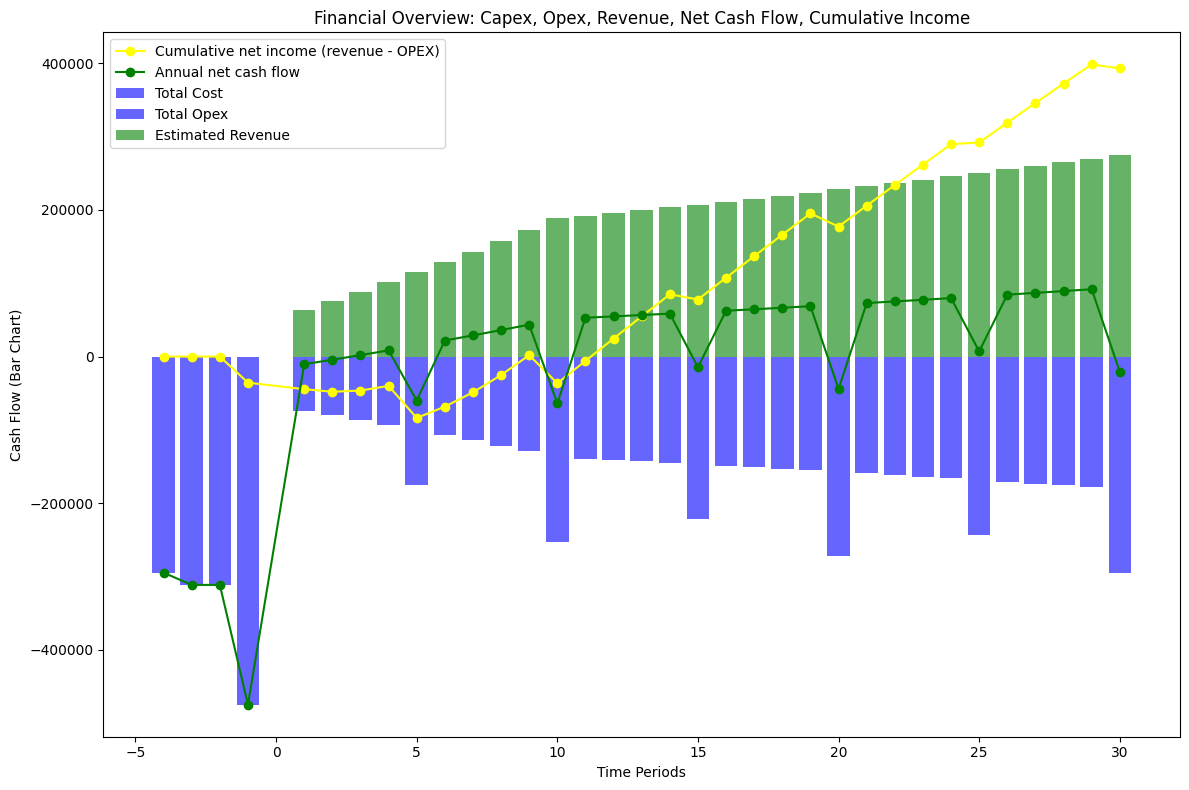

In [11]:
cost_calculator.plot_financial_data()

# Calculate breakeven price:

Calculate carbon price to obtain NPV covering cost to zero.

In [12]:
def calculate_breakeven_cost(project, max_iterations=100, tolerance=1e-5):
    """
    Function to calculate the breakeven cost of carbon
    """
    # Start the calculation with the initial carbon price
    carbon_price = Project.carbon_price

    for iteration in range(max_iterations):
        # Update the project carbon price and initialize cost calculator
        Project.carbon_price = carbon_price
        cost_calculator = CostCalculator(Project)

        # Calculate NPV covering cost
        npv_covering_cost = cost_calculator.NPV_covering_cost
        credits_issued = cost_calculator.credits_issued

        print(f"""Iteration {iteration}: NPV covering cost = {npv_covering_cost},
        Carbon price = {carbon_price}""")

        # Check if the NPV covering cost is within the acceptable tolerance
        if abs(npv_covering_cost) < tolerance:
            print("Converged successfully.")

            # Retrieve additional cost estimates and summary
            cost_summary = cost_calculator.get_summary()  # Assuming this method exists
            cost_estimates = cost_calculator.get_cost_estimates()  # Assuming this method exists

            return {
                "breakeven_carbon_price": float(carbon_price),
                "cost_summary": cost_summary,
                "cost_estimates": cost_estimates,
            }

        # Ensure credits_issued is not zero to avoid division errors
        if credits_issued == 0:
            print("Error: Credits issued are zero, breakeven cost cannot be calculated.")
            return None

        # Update carbon price based on the NPV covering cost and credits issued
        carbon_price -= npv_covering_cost / credits_issued

    # If max_iterations are reached without convergence, return the last calculated price
    print("Warning: Max iterations reached without convergence.")
    return {
        "breakeven_carbon_price": float(carbon_price),
        "cost_summary": cost_calculator.get_summary(),
        "cost_estimates": cost_calculator.get_cost_estimates(),
    }

In [13]:
# Calculate the breakeven cost
breakeven_cost = calculate_breakeven_cost(Project)
print(f"The breakeven cost is: {breakeven_cost}")

Iteration 0: NPV covering cost = 392807.1407714435,
        Carbon price = 20
Iteration 1: NPV covering cost = 275288.8675036202,
        Carbon price = 18.259606428551695
Iteration 2: NPV covering cost = 192929.18255659007,
        Carbon price = 17.039895976359695
Iteration 3: NPV covering cost = 135209.4976432866,
        Carbon price = 16.185093010184403
Iteration 4: NPV covering cost = 94758.12840075488,
        Carbon price = 15.586026149956291
Iteration 5: NPV covering cost = 66408.81783099822,
        Carbon price = 15.166185417969436
Iteration 6: NPV covering cost = 46540.92646342027,
        Carbon price = 14.871950747455134
Iteration 7: NPV covering cost = 32617.021456182934,
        Carbon price = 14.665743882001752
Iteration 8: NPV covering cost = 22858.807710011257,
        Carbon price = 14.521229058898875
Iteration 9: NPV covering cost = 16020.012453474803,
        Carbon price = 14.41994953044798
Iteration 10: NPV covering cost = 11227.21719633136,
        Carbon price